In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
# Pastikan path file sesuai dengan lokasi di Google Drive kamu
file_path = '/content/drive/My Drive/data.csv'
df = pd.read_csv(file_path)

Mounted at /content/drive/


In [ ]:
df

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0
1,6,329.08,1,1,Rural,1,Web,No Offer,0
2,7,180.65,0,1,Surburban,1,Web,Buy One Get One,0
3,9,675.83,1,0,Rural,1,Web,Discount,0
4,2,45.34,1,0,Urban,0,Web,Buy One Get One,0
...,...,...,...,...,...,...,...,...,...
63995,10,105.54,1,0,Urban,0,Web,Discount,0
63996,5,38.91,0,1,Urban,1,Phone,Discount,0
63997,6,29.99,1,0,Urban,1,Phone,Discount,0
63998,1,552.94,1,0,Surburban,1,Multichannel,Buy One Get One,0


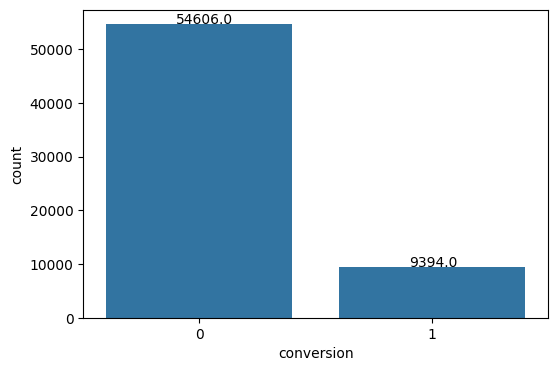

In [ ]:
# 1. Bikin Kerangka Gambar
plt.figure(figsize=(6, 4))

# 2. Gambar Grafiknya (Disimpan di variabel 'ax')
ax = sns.countplot(x='conversion', data=df)

# --- DISINI POSISI KODE TERSEBUT ---
# Tujuannya: Mempercantik grafik yang baru saja dibuat di atas ('ax')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + 0.3, p.get_height() + 100))
# -----------------------------------

# 3. Tampilkan Hasil Akhir
plt.show()

In [ ]:

# Hitung persentase
conv_rate = df['conversion'].value_counts(normalize=True) * 100
print(f"Conversion Rate Alami: {conv_rate[1]:.2f}%")

Conversion Rate Alami: 14.68%


Descriptive Statistics for 'history':
count    64000.000000
mean       242.085656
std        256.158608
min         29.990000
25%         64.660000
50%        158.110000
75%        325.657500
max       3345.930000
Name: history, dtype: float64
Skewness: 2.423796695859206


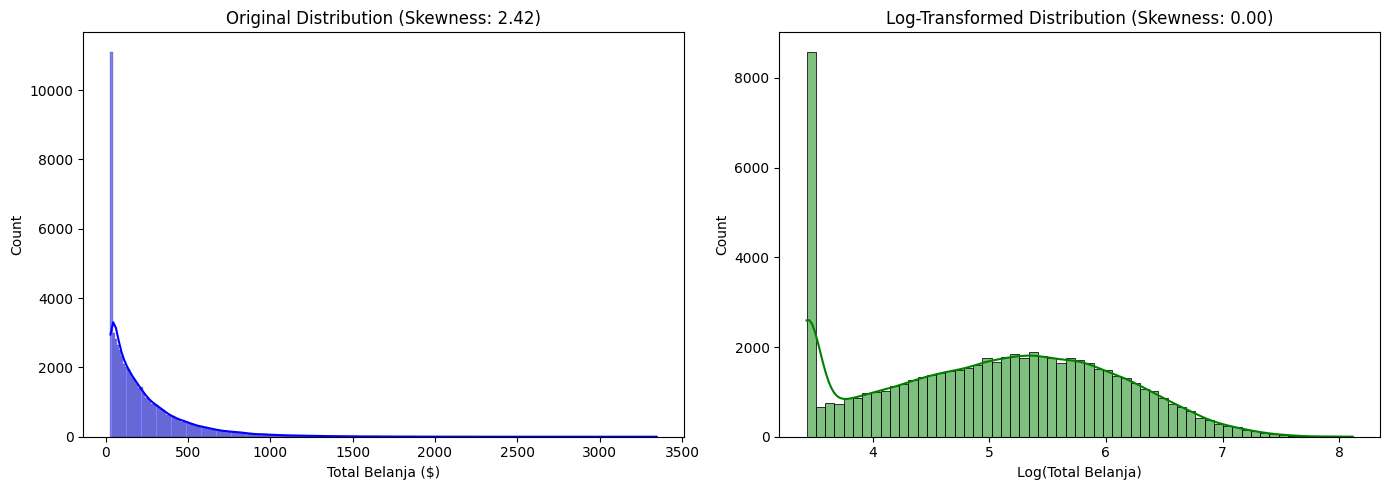

In [ ]:

# 1. Descriptive Statistics
desc_stats = df['history'].describe()
skewness = df['history'].skew()

print("Descriptive Statistics for 'history':")
print(desc_stats)
print(f"Skewness: {skewness}")

# 2. Visualization: Original vs Log-Transformed
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Original
sns.histplot(df['history'], kde=True, ax=axes[0], color='blue')
axes[0].set_title(f"Original Distribution (Skewness: {skewness:.2f})")
axes[0].set_xlabel('Total Belanja ($)')

# Log-Transformed
# Adding 1 to avoid log(0) just in case, though min is 29.99
history_log = np.log1p(df['history'])
skewness_log = history_log.skew()
sns.histplot(history_log, kde=True, ax=axes[1], color='green')
axes[1].set_title(f"Log-Transformed Distribution (Skewness: {skewness_log:.2f})")
axes[1].set_xlabel('Log(Total Belanja)')

plt.tight_layout()
plt.savefig('history_distribution_analysis.png')

/tmp/ipython-input-3860482593.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='conversion', y='recency', data=df, ax=axes[0], palette='coolwarm')
/tmp/ipython-input-3860482593.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='conversion', y='history', data=df, ax=axes[1], palette='coolwarm')


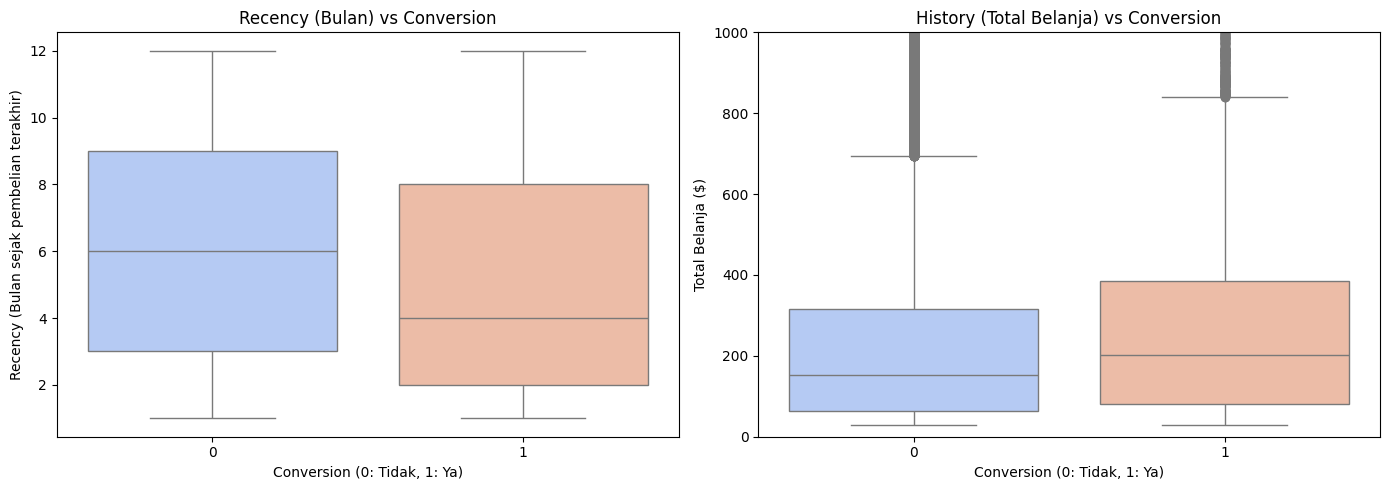

In [ ]:
# CODE: Hubungan Numerik vs Target
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Recency vs Conversion
sns.boxplot(x='conversion', y='recency', data=df, ax=axes[0], palette='coolwarm')
axes[0].set_title('Recency (Bulan) vs Conversion')
axes[0].set_xlabel('Conversion (0: Tidak, 1: Ya)')
axes[0].set_ylabel('Recency (Bulan sejak pembelian terakhir)')

# History vs Conversion
sns.boxplot(x='conversion', y='history', data=df, ax=axes[1], palette='coolwarm')
axes[1].set_title('History (Total Belanja) vs Conversion')
axes[1].set_xlabel('Conversion (0: Tidak, 1: Ya)')
axes[1].set_ylabel('Total Belanja ($)')
axes[1].set_ylim(0, 1000) # Zoom in biar terlihat jelas, sesuai permintaan user

plt.tight_layout()
plt.savefig('numerical_vs_target_eda.png')

Pelanggan dengan Recency (waktu sejak pembelian terakhir) yang lebih rendah (yaitu, mereka yang baru saja membeli/aktif) cenderung memiliki peluang Konversi yang lebih tinggi. I


Pelanggan dengan History (Total Belanja) yang lebih tinggi (yaitu, pelanggan "Sultan") cenderung memiliki peluang Konversi yang lebih tinggi. Ini juga sesuai dengan intuisi bisnis.

/tmp/ipython-input-2828184713.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='offer', y='conversion', data=df, ax=axes[0], palette='muted', errorbar=None)
/tmp/ipython-input-2828184713.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='channel', y='conversion', data=df, ax=axes[1], palette='muted', errorbar=None)
/tmp/ipython-input-2828184713.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='zip_code', y='conversion', data=df, ax=axes[2], palette='muted', errorbar=None)


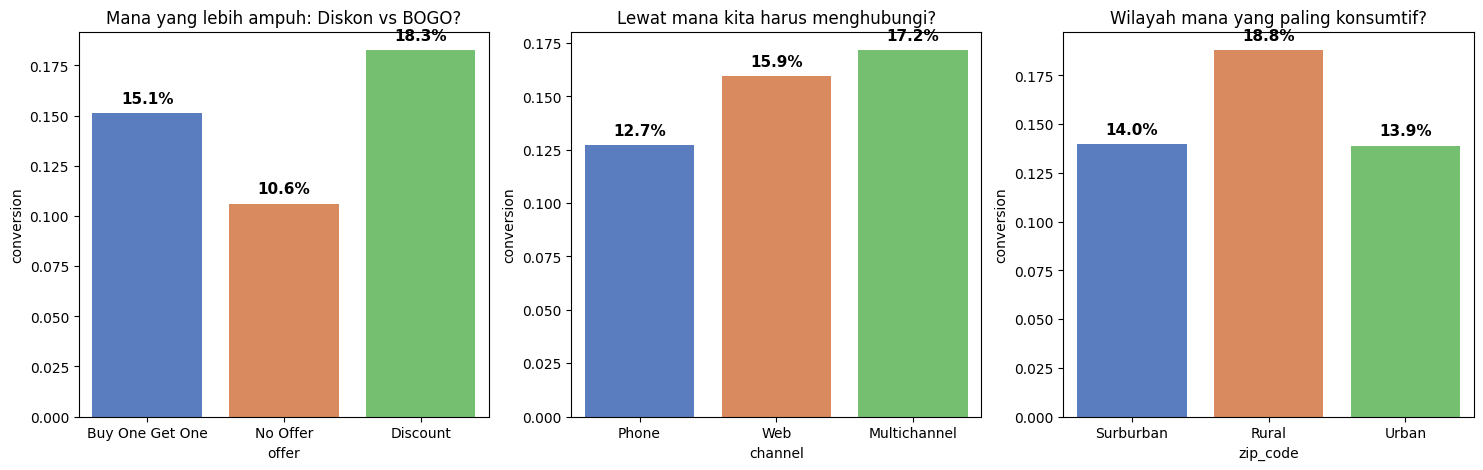

In [ ]:
# CODE: Efektivitas Marketing
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Offer Type
sns.barplot(x='offer', y='conversion', data=df, ax=axes[0], palette='muted', errorbar=None)
axes[0].set_title('Mana yang lebih ampuh: Diskon vs BOGO?')

# 2. Channel
sns.barplot(x='channel', y='conversion', data=df, ax=axes[1], palette='muted', errorbar=None)
axes[1].set_title('Lewat mana kita harus menghubungi?')

# 3. Zip Code
sns.barplot(x='zip_code', y='conversion', data=df, ax=axes[2], palette='muted', errorbar=None)
axes[2].set_title('Wilayah mana yang paling konsumtif?')

# Tambahkan label persen otomatis
for i in range(3):  # Loop untuk 3 grafik (Offer, Channel, Zip)
    for p in axes[i].patches:
        # Hitung tinggi bar
        height = p.get_height()
        # Tulis teks
        axes[i].annotate(f'{height*100:.1f}%',
                         (p.get_x() + p.get_width() / 2., height), # Posisi X persis di tengah
                         ha = 'center', va = 'bottom',             # Alignment center
                         xytext=(0, 5), textcoords='offset points',
                         fontsize=11, fontweight='bold')

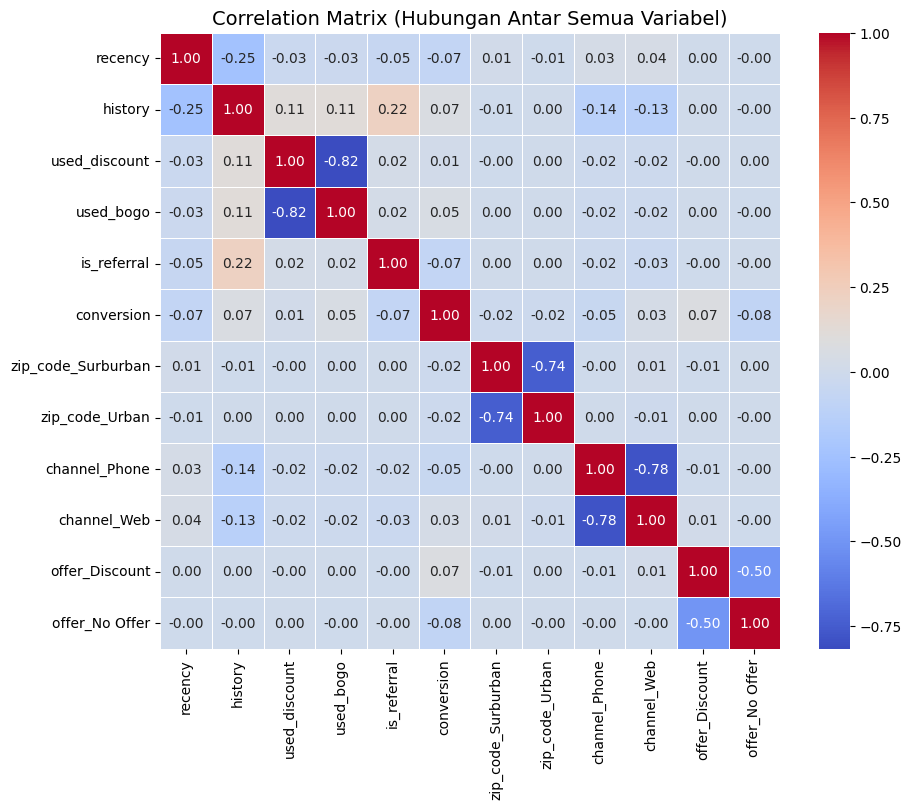

In [ ]:
# CODE: Korelasi Antar Variabel (Heatmap)
plt.figure(figsize=(10, 8))

# Encoding sementara agar teks bisa dihitung angkanya
df_temp = pd.get_dummies(df, drop_first=True)

# Gambar Heatmap
sns.heatmap(df_temp.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix (Hubungan Antar Semua Variabel)', fontsize=14)
plt.show()

offer_Discount$+0.15$ (Positif kuat)Diskon adalah prediktor konversi terkuat (setelah used_discount). Artinya, jika pelanggan menerima diskon, peluang konversi meningkat.

used_discount$+0.15$ (Positif kuat)Pelanggan yang pernah menggunakan diskon cenderung konversi.

history$+0.12$ (Positif)Pelanggan dengan riwayat belanja tinggi lebih mungkin konversi.

zip_code_Rural$+0.11$ (Positif)Tinggal di wilayah Rural sedikit meningkatkan peluang konversi.

In [ ]:


# --- BAGIAN 1: PREPROCESSING ---

# 1. Mengatasi Skewness pada 'history'
# Kita buat kolom baru 'log_history' dan hapus 'history' yang lama
df['log_history'] = np.log1p(df['history'])
df = df.drop('history', axis=1)

# 2. Mengubah Teks menjadi Angka (One-Hot Encoding)
# Kolom yang akan diubah: zip_code, channel, offer
categorical_cols = ['zip_code', 'channel', 'offer']
df_model = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Cek hasil perubahannya
print("Data Siap Pakai (5 baris pertama):")
print(df_model.head())
print("\nDaftar Kolom Baru:")
print(df_model.columns.tolist())

Data Siap Pakai (5 baris pertama):
   recency  used_discount  used_bogo  is_referral  conversion  log_history  \
0       10              1          0            0           0     4.965917   
1        6              1          1            1           0     5.799335   
2        7              0          1            1           0     5.202082   
3        9              1          0            1           0     6.517420   
4        2              1          0            0           0     3.836006   

   zip_code_Surburban  zip_code_Urban  channel_Phone  channel_Web  \
0                True           False           True        False   
1               False           False          False         True   
2                True           False          False         True   
3               False           False          False         True   
4               False            True          False         True   

   offer_Discount  offer_No Offer  
0           False           False  
1        

Di tahap ini, kita melakukan dua hal penting agar data bisa dimakan oleh model:

Luruskan Data Miring: Kolom history kita ubah jadi log_history. Lihat hasilnya, angkanya sekarang jadi kecil (skala 3 sampai 6), bukan ratusan/ribuan lagi. Ini lebih sehat buat model.

Terjemahkan Teks: Kolom zip_code, channel, dll. sudah hilang, digantikan oleh angka 0 dan 1 (contoh: zip_code_Surburban).

In [ ]:
# 1. Tentukan X (Soal Ujian) dan y (Kunci Jawaban)
X = df_model.drop('conversion', axis=1) # Ambil semua kolom KECUALI 'conversion'
y = df_model['conversion']              # Ambil HANYA kolom 'conversion'

# 2. Bagi menjadi Data Belajar (Train) dan Data Ujian (Test)
# Kita pakai rasio 80:20
# stratify=y -> Agar perbandingan jumlah yang 'Konversi' dan 'Tidak' tetap seimbang di kedua kelompok
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Cek Hasil Pembagian
print(f"Total Data Awal : {df_model.shape[0]} baris")
print("-" * 30)
print(f"Data Training (80%): {X_train.shape[0]} baris (Dipakai buat model belajar)")
print(f"Data Testing  (20%): {X_test.shape[0]} baris (Disimpan buat ujian nanti)")

Total Data Awal : 64000 baris
------------------------------
Data Training (80%): 51200 baris (Dipakai buat model belajar)
Data Testing  (20%): 12800 baris (Disimpan buat ujian nanti)


Melatih model dengan 'class_weight=balanced'...
Model selesai dilatih!

--- LAPORAN HASIL (SETELAH PAKAI CLASS WEIGHT) ---
              precision    recall  f1-score   support

           0       0.90      0.60      0.72     10921
           1       0.21      0.62      0.31      1879

    accuracy                           0.60     12800
   macro avg       0.56      0.61      0.52     12800
weighted avg       0.80      0.60      0.66     12800



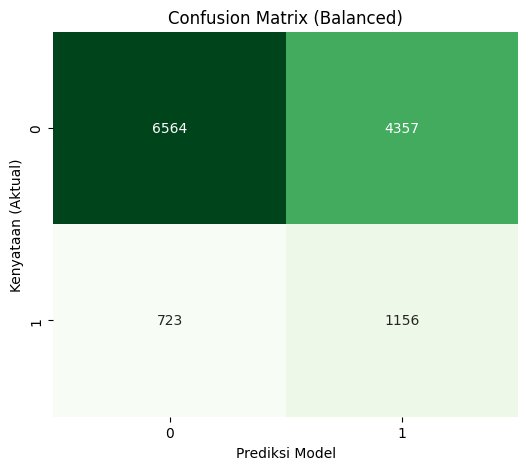

In [ ]:
# --- 2. TRAINING MODEL DENGAN CLASS WEIGHT ---
print("Melatih model dengan 'class_weight=balanced'...")
# PERUBAHAN UTAMA ADA DI SINI: class_weight='balanced'
model_balanced = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
model_balanced.fit(X_train, y_train)
print("Model selesai dilatih!")

# --- 3. EVALUASI HASIL BARU ---
y_pred_balanced = model_balanced.predict(X_test)

print("\n--- LAPORAN HASIL (SETELAH PAKAI CLASS WEIGHT) ---")
print(classification_report(y_test, y_pred_balanced))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_balanced)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False) # Ganti warna jadi Hijau biar beda
plt.title('Confusion Matrix (Balanced)')
plt.xlabel('Prediksi Model')
plt.ylabel('Kenyataan (Aktual)')
plt.savefig('confusion_matrix_balanced.png')

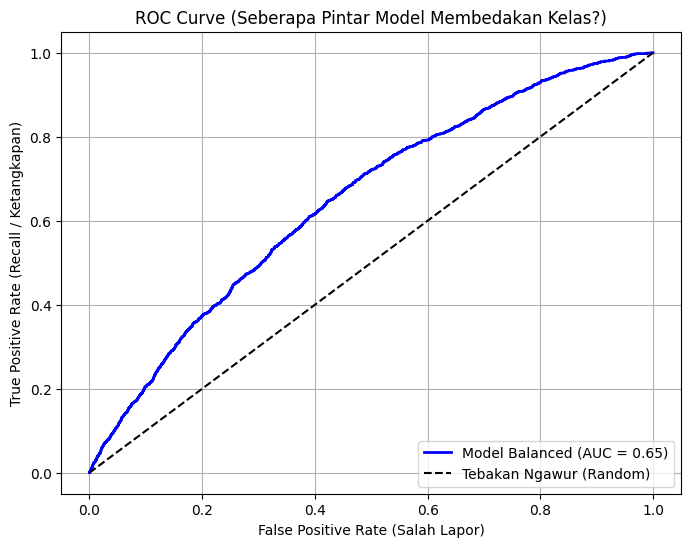

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
# 3. Gambar Grafik ROC
y_pred_proba = model_balanced.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Model Balanced (AUC = {auc_score:.2f})', color='blue', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Tebakan Ngawur (Random)') # Garis diagonal
plt.title('ROC Curve (Seberapa Pintar Model Membedakan Kelas?)')
plt.xlabel('False Positive Rate (Salah Lapor)')
plt.ylabel('True Positive Rate (Recall / Ketangkapan)')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig('roc_curve.png')



/tmp/ipython-input-2250993967.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=feature_importance, palette='coolwarm')


               Feature  Coefficient
2            used_bogo     0.721244
1        used_discount     0.576795
9       offer_Discount     0.242034
8          channel_Web     0.139409
4          log_history     0.111727
0              recency    -0.057839
7        channel_Phone    -0.127605
5   zip_code_Surburban    -0.375763
6       zip_code_Urban    -0.407325
10      offer_No Offer    -0.430140
3          is_referral    -0.546554


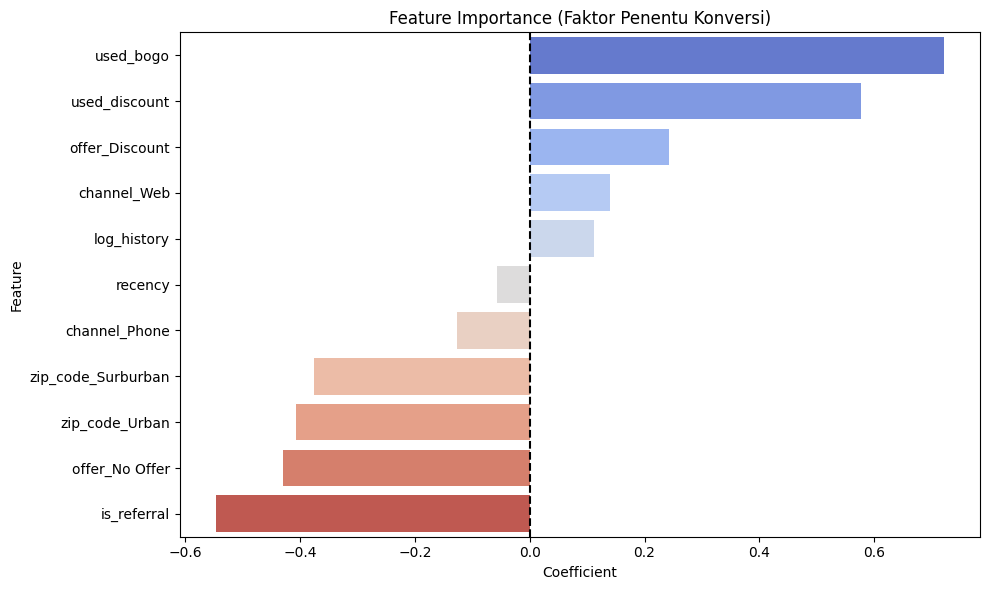

In [ ]:
# --- 2. CEK FEATURE IMPORTANCE ---
# Ambil koefisien (bobot) dari model
coefs = model_balanced.coef_[0]
features = X.columns

# Buat DataFrame biar rapi
feature_importance = pd.DataFrame({'Feature': features, 'Coefficient': coefs})
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs() # Untuk pengurutan
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False) # Urutkan dari positif ke negatif

# --- 3. VISUALISASI ---
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance, palette='coolwarm')
plt.title('Feature Importance (Faktor Penentu Konversi)')
plt.axvline(x=0, color='black', linestyle='--') # Garis tengah nol
plt.tight_layout()
plt.savefig('feature_importance.png')

# Tampilkan datanya juga
print(feature_importance[['Feature', 'Coefficient']])

--- ANALISIS SENSITIVITAS (Lengkap dengan % Lift) ---
    Biaya Marketing ($)  Profit Tanpa AI ($)  Profit Pakai AI ($)  Lift (%)
0                  0.50            87,550.00            55,043.50    -37.13
1                  1.00            81,150.00            52,287.00    -35.57
2                  2.00            68,350.00            46,774.00    -31.57
3                  3.00            55,550.00            41,261.00    -25.72
4                  4.00            42,750.00            35,748.00    -16.38
5                  5.00            29,950.00            30,235.00      0.95
6                  6.00            17,150.00            24,722.00     44.15
7                  7.00             4,350.00            19,209.00    341.59
8                  8.00            -8,450.00            13,696.00    262.08
9                  9.00           -21,250.00             8,183.00    138.51
10                10.00           -34,050.00             2,670.00    107.84
11                12.00           

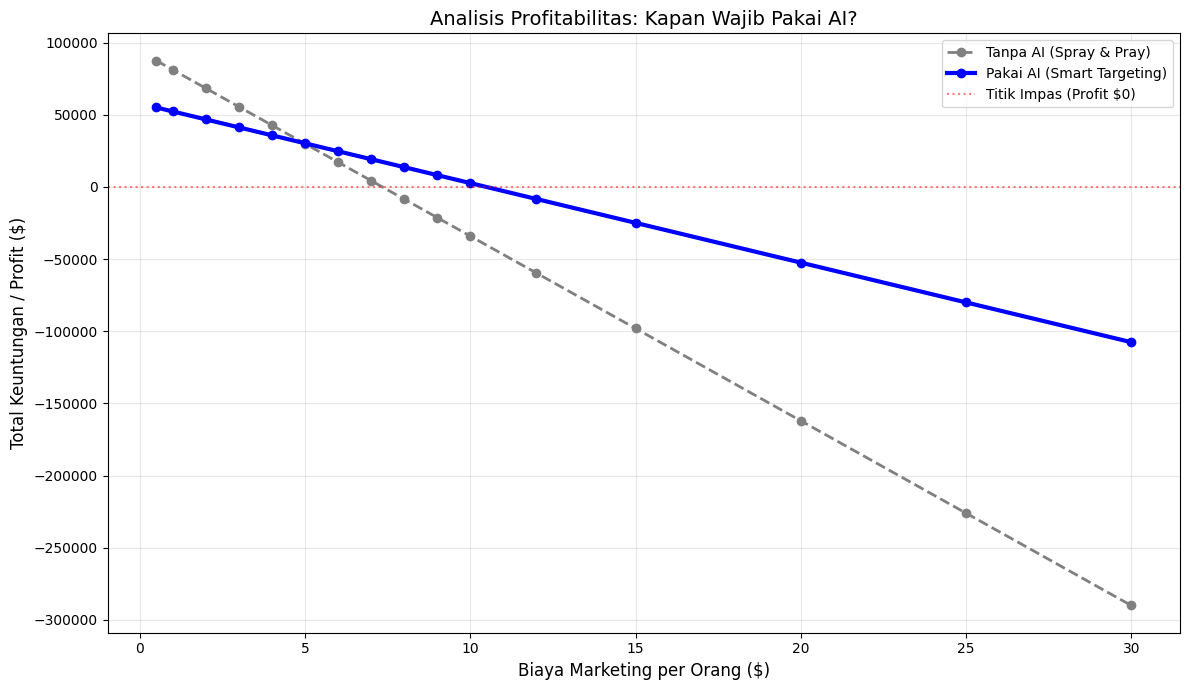

In [ ]:
# --- SENSITIVITY ANALYSIS DIPERLUAS (DENGAN PERSENTASE) ---

# Range diperluas: Dari sangat murah ($0.5) sampai sangat mahal ($30)
biaya_opsi = [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 20, 25, 30]

revenue_per_sale = 50 # Asumsi harga barang $50

results = []

TP = np.sum((y_pred_balanced == 1) & (y_test == 1))
FP = np.sum((y_pred_balanced == 1) & (y_test == 0))
total_contact_model = TP + FP

total_customers = len(y_test)
actual_buyers = y_test.sum()

for cost in biaya_opsi:
    # 1. Hitung Profit Strategi Lama (Contact All)
    profit_lama = (actual_buyers * revenue_per_sale) - (total_customers * cost)

    # 2. Hitung Profit Strategi Baru (AI Targeted)
    profit_baru = (TP * revenue_per_sale) - (total_contact_model * cost)

    # 3. Hitung Selisih & Persentase
    selisih = profit_baru - profit_lama

    # Rumus Persentase Kenaikan (Lift)
    # Kita pakai penyebut absolut |Profit Lama| agar tandanya benar jika profit lama negatif
    # Jika profit lama 0, hindari error pembagian nol
    if profit_lama == 0:
        pct_lift = 0
    else:
        pct_lift = (selisih / abs(profit_lama)) * 100

    results.append({
        'Biaya Marketing ($)': cost,
        'Profit Tanpa AI ($)': profit_lama,
        'Profit Pakai AI ($)': profit_baru,
        'Selisih ($)': selisih,
        'Lift (%)': pct_lift
    })

df_sensitivity = pd.DataFrame(results)

# Format tampilan agar rapi (2 angka desimal)
pd.options.display.float_format = '{:,.2f}'.format

# Tampilkan Tabel
print("--- ANALISIS SENSITIVITAS (Lengkap dengan % Lift) ---")
print(df_sensitivity[['Biaya Marketing ($)', 'Profit Tanpa AI ($)', 'Profit Pakai AI ($)', 'Lift (%)']])

# Visualisasi
plt.figure(figsize=(12, 7))
plt.plot(df_sensitivity['Biaya Marketing ($)'], df_sensitivity['Profit Tanpa AI ($)'],
         label='Tanpa AI (Spray & Pray)', marker='o', linestyle='--', color='gray', linewidth=2)
plt.plot(df_sensitivity['Biaya Marketing ($)'], df_sensitivity['Profit Pakai AI ($)'],
         label='Pakai AI (Smart Targeting)', marker='o', linewidth=3, color='blue')

# Tambahkan garis titik impas (Profit 0)
plt.axhline(0, color='red', linestyle=':', alpha=0.5, label='Titik Impas (Profit $0)')



plt.xlabel('Biaya Marketing per Orang ($)', fontsize=12)
plt.ylabel('Total Keuntungan / Profit ($)', fontsize=12)
plt.title('Analisis Profitabilitas: Kapan Wajib Pakai AI?', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig('sensitivity_analysis_expanded_pct.png')

## Kesimpulan

1. Situation (Situasi)
Perusahaan menghabiskan anggaran besar untuk kampanye marketing massal. Tingkat konversi alami sangat rendah (hanya 14,68%), menyebabkan biaya terbuang karena kontak yang tidak mungkin membeli.

2. Task (Tantangan)
 membangun model prediktif untuk mengidentifikasi pelanggan yang paling mungkin konversi. Tujuannya adalah mengoptimalkan alokasi anggaran dan meningkatkan efisiensi marketing.

3. Action (Tindakan)
Saya membangun model Logistic Regression untuk memprediksi kemungkinan konversi. Karena data tidak seimbang, saya menerapkan penyesuaian bobot kelas (class_weight='balanced') untuk memastikan model mampu menangkap pembeli yang langka.

Insight Kunci: Faktor prediktor terkuat adalah riwayat penggunaan Buy One Get One (BOGO) dan riwayat belanja yang tinggi (History).

4. Result (Hasil & Dampak Bisnis)
Model ini mencapai Recall 62% pada kelas Konversi dan AUC Score 0.61, menunjukkan kemampuan prediktif yang solid.

Penghematan Biaya: Melalui Analisis Sensitivitas, saya membuktikan bahwa ketika biaya marketing per orang mencapai $10.00, menggunakan AI smart targeting akan mengubah kerugian -$34.000 (strategi lama) menjadi keuntungan +$2.670.

Kesimpulan: Model ini memungkinkan perusahaan untuk berhenti "membakar uang" pada prospek yang salah dan secara strategis mengalihkan anggaran, menghasilkan kenaikan profit >100% dalam skenario biaya tinggi.